In [20]:
import matplotlib.pyplot as plt
import numpy as np

from Analysis_Helper import calculate_deltaR, change_cmap_bkg_to_white
import matplotlib.colors as colors
import matplotlib.cm as cm
cmap = 'rainbow'
cmap = change_cmap_bkg_to_white(cmap)

In [24]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 7)

In [11]:
# Load inputs
# inputs = np.load('nn_input_MX700_MY400_classifier.npz')
# inputs = np.load('nn_input_MX700_MY400_classifier_ptetacuts.npz')
inputs = np.load('Inputs/nn_input_MX700_MY400_classifier_allpairs.npz')

# Define parameters
X = inputs['x']
X_excess = inputs['extra_bkgd_x']

# Define output
y = inputs['y']
y_excess = inputs['extra_bkgd_y']

# Used to compare score with dijet invariant mass
mjj = inputs['mjj'] # GeV
mjj_excess = inputs['extra_bkgd_mjj'] # GeV

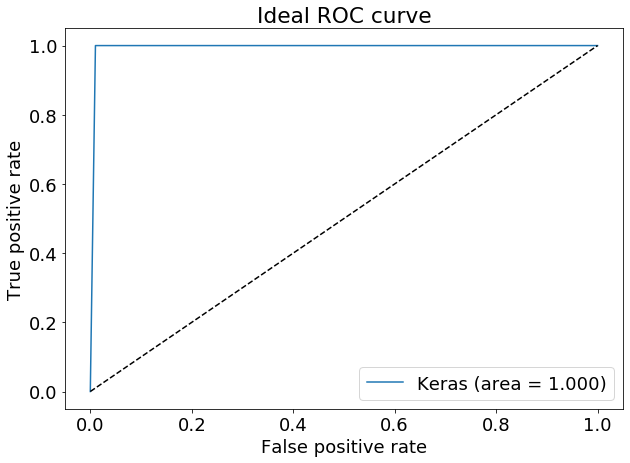

In [25]:
fig, ax = plt.subplots()

fpr = np.linspace(0,1,100)
tpr = np.ones_like(fpr)
tpr[0] = 0

ax.plot(fpr, tpr, label='Keras (area = 1.000)')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('Ideal ROC curve')
ax.legend()

No handles with labels found to put in legend.


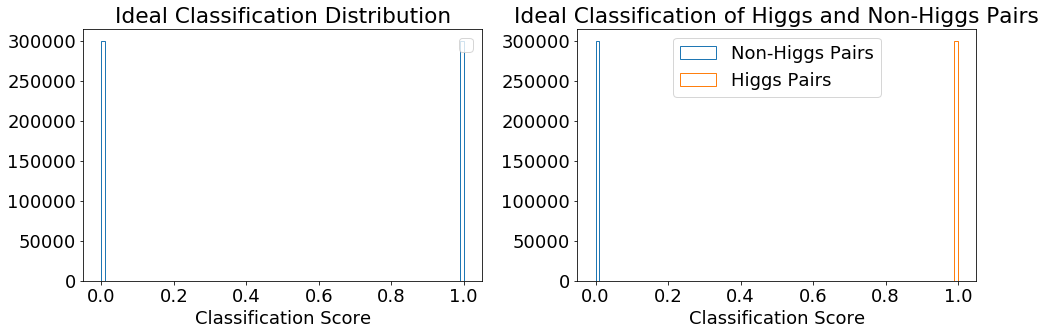

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax = axs[0]
ax.hist(y, bins=fpr, histtype='step', align='mid')
ax.set_xlabel('Classification Score')
ax.set_title('Ideal Classification Distribution')
ax.legend()

ax = axs[1]
ax.hist(y[y==0], bins=fpr, histtype='step', align='mid', label='Non-Higgs Pairs')
ax.hist(y[y==1], bins=fpr, histtype='step', align='mid', label='Higgs Pairs')
ax.set_xlabel('Classification Score')
ax.set_title('Ideal Classification of Higgs and Non-Higgs Pairs')
ax.legend(loc=9)

plt.tight_layout()

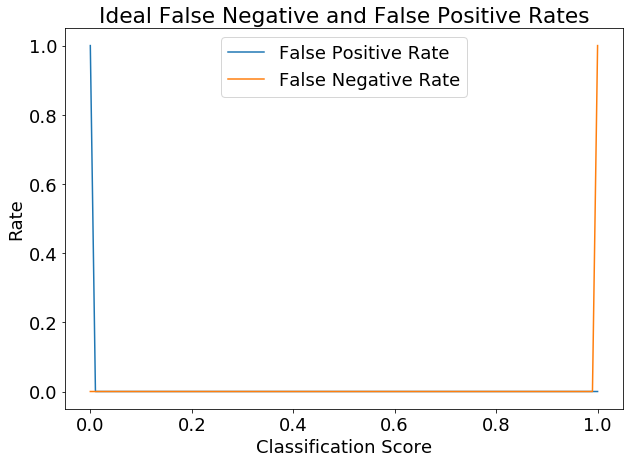

In [28]:
fig, ax = plt.subplots()

scores = np.linspace(0,1,100)
fpr = np.zeros_like(scores)
fpr[0] = 1
fnr = np.zeros_like(scores)
fnr[-1] = 1

ax.plot(scores, fpr, label='False Positive Rate')
ax.plot(scores, fnr, label='False Negative Rate')
ax.set_xlabel('Classification Score')
ax.set_ylabel('Rate')
ax.set_title('Ideal False Negative and False Positive Rates')
ax.legend()

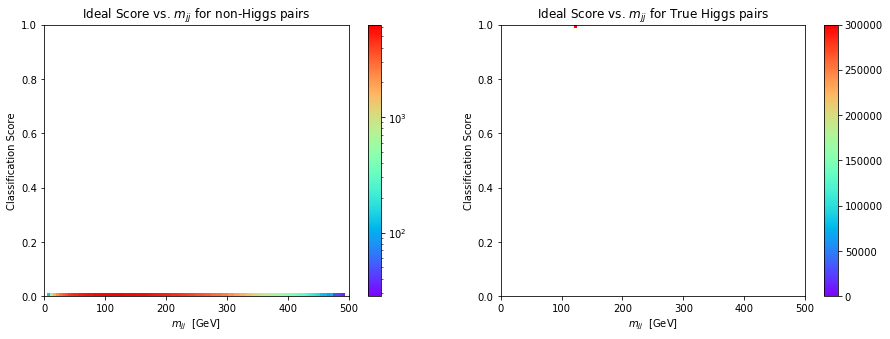

In [23]:
mass_bins = np.linspace(0, 500, 100)

fig4, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax = axs[0]
ax.set_title(r"Ideal Score vs. $m_{jj}$ for non-Higgs pairs")
n, bx, by, im = ax.hist2d(mjj[y == 0], y[y==0], bins=[mass_bins,scores], norm=colors.LogNorm(), cmap=cmap)
ax.set_xlabel(r'$m_{jj}$  [GeV]')
ax.set_ylabel(r'Classification Score')
fig.colorbar(im, ax=ax)

ax = axs[1]
ax.set_title(r"Ideal Score vs. $m_{jj}$ for True Higgs pairs")
n, bx, by, im = ax.hist2d(mjj[y == 1], y[y==1], bins=[mass_bins,scores], cmap=cmap)
ax.set_xlabel(r'$m_{jj}$  [GeV]')
ax.set_ylabel(r'Classification Score')
fig.colorbar(im, ax=ax)
plt.show()

In [22]:
mjj[y == 1]

array([125.02749634, 125.00743866, 124.92672729, ..., 125.12515259,
       125.04227448, 124.95549011])